# Cleaning a messy CSV File of tweets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

## Loading csv file using pandas

In [2]:
df = pd.read_csv('data/India.csv', engine='python', on_bad_lines='skip')


In [3]:
df.shape

(9117, 39)

In [4]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1547968198808858624,1547968198808858624,1657899353000.0,2022-07-15 15:35:53,0,NaN,We may have many problems in #India but we als...,en,"['india', 'usa']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1547968083750400004,1547968083750400004,1657899325000.0,2022-07-15 15:35:25,0,NaN,"Let’s acknowledge and identify exhaustion, hel...",en,"['mttalk', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1547968065966841857,1546146173102485504,1657899321000.0,2022-07-15 15:35:21,0,NaN,@Adani_Elec_Mum Yes im still waiting for your ...,en,"['india', 'adanigroup', 'adani']",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Adani_Elec_Mum', 'name': 'Ad...",NaN,NaN,NaN,NaN
3,3,1547968055187124226,1547968055187124226,1657899318000.0,2022-07-15 15:35:18,0,NaN,Opaque Watercolor Supervision watercolor paint...,und,"['supervision', 'israelwatercolor', '水彩画', 'wa...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1547968036002340868,1547968036002340868,1657899314000.0,2022-07-15 15:35:14,0,NaN,⚡بھارتی فوجی نے اپنے ہی دو ساتھیوں کو مار کر خ...,ur,['india'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


### Checking for missing Values

In [5]:
df.isnull().sum()

Unnamed: 0            0
id                    0
conversation_id       0
created_at            0
date                  0
timezone              0
place              9104
tweet                 0
language              1
hashtags              1
cashtags              1
user_id               1
user_id_str           1
username              1
name                  1
day                   1
hour                  1
link                  1
urls                  1
photos                2
video                 1
thumbnail          5255
retweet               2
nlikes                2
nreplies              2
nretweets             2
quote_url          8415
search                1
near               9117
geo                9117
source             9117
user_rt_id         9117
user_rt            9117
retweet_id         9117
reply_to              2
retweet_date       9117
translate          9117
trans_src          9117
trans_dest         9117
dtype: int64

Some columns in the dataset have no values completely empty so removing it

In [6]:
df = df.dropna(axis=1, how='all')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9117 non-null   object 
 1   id               9117 non-null   object 
 2   conversation_id  9117 non-null   object 
 3   created_at       9117 non-null   object 
 4   date             9117 non-null   object 
 5   timezone         9117 non-null   int64  
 6   place            13 non-null     object 
 7   tweet            9117 non-null   object 
 8   language         9116 non-null   object 
 9   hashtags         9116 non-null   object 
 10  cashtags         9116 non-null   object 
 11  user_id          9116 non-null   object 
 12  user_id_str      9116 non-null   object 
 13  username         9116 non-null   object 
 14  name             9116 non-null   object 
 15  day              9116 non-null   object 
 16  hour             9116 non-null   float64
 17  link          

In [8]:
df.shape

(9117, 29)

In [9]:
df.isnull().sum()


Unnamed: 0            0
id                    0
conversation_id       0
created_at            0
date                  0
timezone              0
place              9104
tweet                 0
language              1
hashtags              1
cashtags              1
user_id               1
user_id_str           1
username              1
name                  1
day                   1
hour                  1
link                  1
urls                  1
photos                2
video                 1
thumbnail          5255
retweet               2
nlikes                2
nreplies              2
nretweets             2
quote_url          8415
search                1
reply_to              2
dtype: int64

In [10]:
df.duplicated().any()

np.False_

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9117 non-null   object 
 1   id               9117 non-null   object 
 2   conversation_id  9117 non-null   object 
 3   created_at       9117 non-null   object 
 4   date             9117 non-null   object 
 5   timezone         9117 non-null   int64  
 6   place            13 non-null     object 
 7   tweet            9117 non-null   object 
 8   language         9116 non-null   object 
 9   hashtags         9116 non-null   object 
 10  cashtags         9116 non-null   object 
 11  user_id          9116 non-null   object 
 12  user_id_str      9116 non-null   object 
 13  username         9116 non-null   object 
 14  name             9116 non-null   object 
 15  day              9116 non-null   object 
 16  hour             9116 non-null   float64
 17  link          

Some columns have no use so removing it

In [12]:
df=df.drop(columns=['place','quote_url','thumbnail','id','conversation_id','created_at','photos','video','retweet',	'nlikes',	'nreplies'	,'nretweets','timezone','cashtags','reply_to'])

In [13]:
df=df.iloc[:,1:]
df.head()

,date,tweet,language,hashtags,user_id,user_id_str,username,name,day,hour,link,urls,search
0,2022-07-15 15:35:53,We may have many problems in #India but we als...,en,"['india', 'usa']",520446669,520446669,tanmay171,†@₦𝕄@¥ ฿ƗŞŴΔŞ 🇮🇳,5,15.0,https://twitter.com/tanmay171/status/154796819...,[],#India
1,2022-07-15 15:35:25,"Let’s acknowledge and identify exhaustion, hel...",en,"['mttalk', 'india']",1462059951497510912,1462059951497510912,DrSupriya_MT,Dr.Supriya,5,15.0,https://twitter.com/DrSupriya_MT/status/154796...,[],#India
2,2022-07-15 15:35:21,@Adani_Elec_Mum Yes im still waiting for your ...,en,"['india', 'adanigroup', 'adani']",1230550155834691584,1230550155834691584,im_the_first_rv,Rohit vishwakarma,5,15.0,https://twitter.com/im_the_first_rv/status/154...,[],#India
3,2022-07-15 15:35:18,Opaque Watercolor Supervision watercolor paint...,und,"['supervision', 'israelwatercolor', '水彩画', 'wa...",1338826822989934592,1338826822989934592,SuperVi54458483,Super Vision,5,15.0,https://twitter.com/SuperVi54458483/status/154...,[],#India
4,2022-07-15 15:35:14,⚡بھارتی فوجی نے اپنے ہی دو ساتھیوں کو مار کر خ...,ur,['india'],1357321712229109765,1357321712229109765,ikramrana55,Ikram Aesthetic ✨🥀,5,15.0,https://twitter.com/ikramrana55/status/1547968...,[],#India


In [14]:
# Filling remaining emtpy values 
df = df.fillna('')

In [15]:
df.isnull().sum()

date           0
tweet          0
language       0
hashtags       0
user_id        0
user_id_str    0
username       0
name           0
day            0
hour           0
link           0
urls           0
search         0
dtype: int64

### Cleaning the tweets to extract text from it 

In [16]:

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  
    text = re.sub(r"@\w+|#\w+", "", text)     
    text = re.sub(r"[^a-z\s.!?]", "", text)
        
    text = re.sub(r"\s+", " ", text).strip()   
    return text

df['tweet'] = df['tweet'].apply(clean_text)


In [17]:
df.head()

,date,tweet,language,hashtags,user_id,user_id_str,username,name,day,hour,link,urls,search
0,2022-07-15 15:35:53,we may have many problems in but we also have ...,en,"['india', 'usa']",520446669,520446669,tanmay171,†@₦𝕄@¥ ฿ƗŞŴΔŞ 🇮🇳,5,15.0,https://twitter.com/tanmay171/status/154796819...,[],#India
1,2022-07-15 15:35:25,lets acknowledge and identify exhaustion help ...,en,"['mttalk', 'india']",1462059951497510912,1462059951497510912,DrSupriya_MT,Dr.Supriya,5,15.0,https://twitter.com/DrSupriya_MT/status/154796...,[],#India
2,2022-07-15 15:35:21,yes im still waiting for your reply,en,"['india', 'adanigroup', 'adani']",1230550155834691584,1230550155834691584,im_the_first_rv,Rohit vishwakarma,5,15.0,https://twitter.com/im_the_first_rv/status/154...,[],#India
3,2022-07-15 15:35:18,opaque watercolor supervision watercolor paint...,und,"['supervision', 'israelwatercolor', '水彩画', 'wa...",1338826822989934592,1338826822989934592,SuperVi54458483,Super Vision,5,15.0,https://twitter.com/SuperVi54458483/status/154...,[],#India
4,2022-07-15 15:35:14,,ur,['india'],1357321712229109765,1357321712229109765,ikramrana55,Ikram Aesthetic ✨🥀,5,15.0,https://twitter.com/ikramrana55/status/1547968...,[],#India


### Counting words and sentences 

In [18]:

def word_count(text):
    return len(str(text).split())

def sentence_count(text):
    return len(re.split(r'[.!?]', str(text))) - 1


In [19]:
df['word_count'] = df['tweet'].apply(word_count)
df['sentence_count'] = df['tweet'].apply(sentence_count)


In [20]:
df.head()

,date,tweet,language,hashtags,user_id,user_id_str,username,name,day,hour,link,urls,search,word_count,sentence_count
0,2022-07-15 15:35:53,we may have many problems in but we also have ...,en,"['india', 'usa']",520446669,520446669,tanmay171,†@₦𝕄@¥ ฿ƗŞŴΔŞ 🇮🇳,5,15.0,https://twitter.com/tanmay171/status/154796819...,[],#India,44,2
1,2022-07-15 15:35:25,lets acknowledge and identify exhaustion help ...,en,"['mttalk', 'india']",1462059951497510912,1462059951497510912,DrSupriya_MT,Dr.Supriya,5,15.0,https://twitter.com/DrSupriya_MT/status/154796...,[],#India,18,1
2,2022-07-15 15:35:21,yes im still waiting for your reply,en,"['india', 'adanigroup', 'adani']",1230550155834691584,1230550155834691584,im_the_first_rv,Rohit vishwakarma,5,15.0,https://twitter.com/im_the_first_rv/status/154...,[],#India,7,0
3,2022-07-15 15:35:18,opaque watercolor supervision watercolor paint...,und,"['supervision', 'israelwatercolor', '水彩画', 'wa...",1338826822989934592,1338826822989934592,SuperVi54458483,Super Vision,5,15.0,https://twitter.com/SuperVi54458483/status/154...,[],#India,9,1
4,2022-07-15 15:35:14,,ur,['india'],1357321712229109765,1357321712229109765,ikramrana55,Ikram Aesthetic ✨🥀,5,15.0,https://twitter.com/ikramrana55/status/1547968...,[],#India,0,0


In [21]:
word_lengths = df['word_count'].values
sentence_lengths = df['sentence_count'].values

print("Average word count:", np.mean(word_lengths))
print("Average sentence count:", np.mean(sentence_lengths))


Average word count: 15.330042777229352
Average sentence count: 1.2433914664911703


### Plotting Histograms and Box plot for visualization of words and sentences

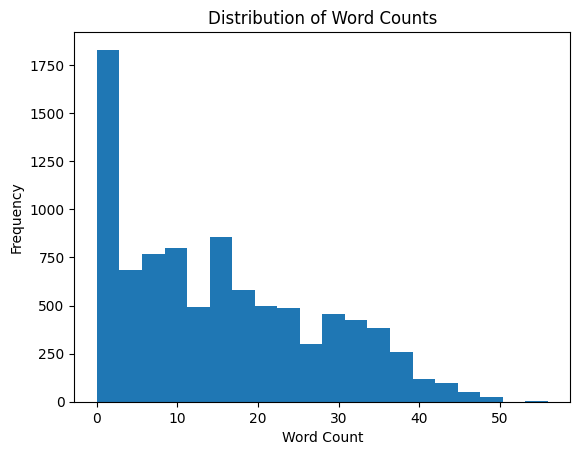

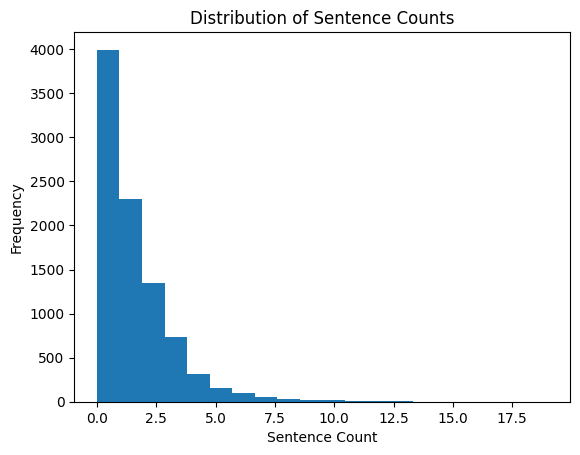

In [22]:
plt.hist(word_lengths, bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()

plt.hist(sentence_lengths, bins=20)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Counts')
plt.show()


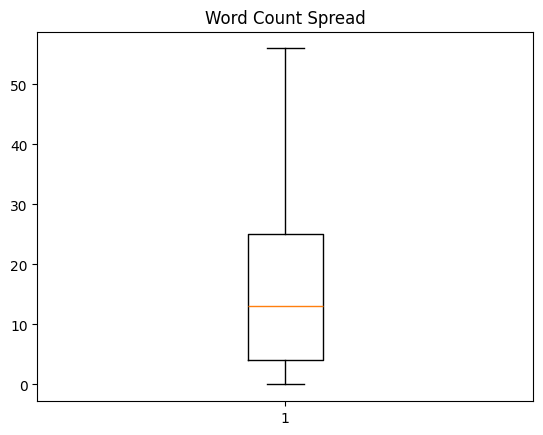

In [23]:
plt.boxplot(word_lengths)
plt.title("Word Count Spread")
plt.show()


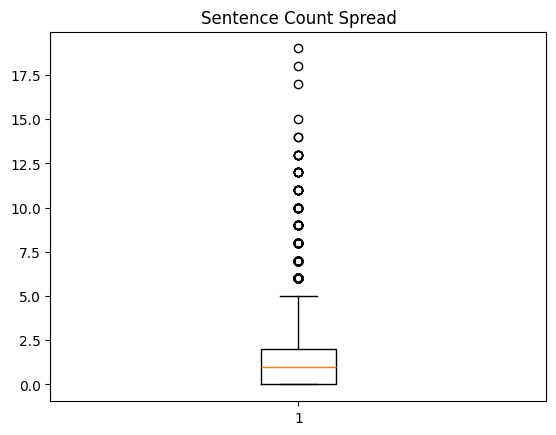

In [24]:
plt.boxplot(sentence_lengths)
plt.title("Sentence Count Spread")
plt.show()